<h4>Import pandas</h4> 


In [1]:
import pandas as pd
import matplotlib.pylab as plt


Use the Pandas method <b>read_csv()</b> to load the data from the web address. Set the parameter  "names" equal to the Python list "headers".


In [18]:
headers= ['Admission_Date', 'Discharge_DATE',	'Outcome',	'Age',	'Gender',	'Sample_Collection_Date', 'Treatment', 'Ventilated (Y/N)',	'Red_blood_cell_distribution_width',	'Monocytes(%)',	'White_blood_cell_count',	'Platelet_Count', 'Lymphocyte_Count',	'Neutrophils_Count']

In [19]:
df = pd.read_csv('cov19_cvc.csv', names = headers)

In [21]:
df.drop(df.index[:1], inplace=True)

In [23]:
df.head()

,Admission_Date,Discharge_DATE,Outcome,Age,Gender,Sample_Collection_Date,Treatment,Ventilated (Y/N),Red_blood_cell_distribution_width,Monocytes(%),White_blood_cell_count,Platelet_Count,Lymphocyte_Count,Neutrophils_Count
1,8/10/2020,8/8/2020,Not Recovered,51,Male,8/10/2020,"antibiotics, O2",Yes,13.2,3.3,21,462,0.44,19.43
2,7/24/2020,8/5/2020,Not Recovered,65,Female,7/24/2020,"Paracetamol, Antibiotics, O2",Yes,40,3,8.79,180.66,4.39,7.56
3,7/22/2020,8/8/2020,Recovered,32,Male,7/22/2020,"Antibiotics, O2",No,11.7,5.3,9.9,336,3.47,5.34
4,7/19/2020,8/5/2020,Recovered,36,Female,7/19/2020,"Antibiotics, O2",No,13,5,9.95,240.1,0.8,8.66
5,7/18/2020,8/5/2020,Recovered,46,Male,7/18/2020,"Paracetamol, Antibiotics, O2",No,31,3,14.15,236.58,7.93,13.02


<h4>Evaluating for Missing Data</h4>

Lets see if there is any null values


In [24]:
missing_data = df.isnull()
missing_data.head(5)

,Admission_Date,Discharge_DATE,Outcome,Age,Gender,Sample_Collection_Date,Treatment,Ventilated (Y/N),Red_blood_cell_distribution_width,Monocytes(%),White_blood_cell_count,Platelet_Count,Lymphocyte_Count,Neutrophils_Count
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False


"True" means the value is a missing value while "False" means the value is not a missing value.


<h4>Count missing values in each column</h4>


In [25]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

Admission_Date
False    103
Name: Admission_Date, dtype: int64

Discharge_DATE
False    103
Name: Discharge_DATE, dtype: int64

Outcome
False    103
Name: Outcome, dtype: int64

Age
False    103
Name: Age, dtype: int64

Gender
False    103
Name: Gender, dtype: int64

Sample_Collection_Date
False    103
Name: Sample_Collection_Date, dtype: int64

Treatment
False    103
Name: Treatment, dtype: int64

Ventilated (Y/N)
False    103
Name: Ventilated (Y/N), dtype: int64

Red_blood_cell_distribution_width
False    103
Name: Red_blood_cell_distribution_width, dtype: int64

Monocytes(%)
False    103
Name: Monocytes(%), dtype: int64

White_blood_cell_count
False    103
Name: White_blood_cell_count, dtype: int64

Platelet_Count
False    103
Name: Platelet_Count, dtype: int64

Lymphocyte_Count
False    103
Name: Lymphocyte_Count, dtype: int64

Neutrophils_Count
False    103
Name: Neutrophils_Count, dtype: int64



In [26]:
df.dtypes

Admission_Date                       object
Discharge_DATE                       object
Outcome                              object
Age                                  object
Gender                               object
Sample_Collection_Date               object
Treatment                            object
Ventilated (Y/N)                     object
Red_blood_cell_distribution_width    object
Monocytes(%)                         object
White_blood_cell_count               object
Platelet_Count                       object
Lymphocyte_Count                     object
Neutrophils_Count                    object
dtype: object

To see which values are present in a particular column, we can use the ".value_counts()" method:


In [27]:
df['Ventilated (Y/N)'].value_counts()

No     55
Yes    48
Name: Ventilated (Y/N), dtype: int64

In [28]:
df["Treatment"].value_counts()

Antibiotics, O2                  42
antibiotics,  O2                 20
Paracetamol, Antibiotics,  O2    18
antibiotics                       9
Antibiotics,  O2                  4
Antibiotic,  O2                   2
Antibiotics,  O8                  1
Antibiotics,  O4                  1
Antibiotics,  O7                  1
Antibiotics,  O5                  1
Antibiotics,  O6                  1
Antibiotics,  O9                  1
Antibiotics                       1
Antibiotics,  O3                  1
Name: Treatment, dtype: int64

In [29]:
df["Gender"].value_counts()

Male      55
Female    48
Name: Gender, dtype: int64

In [30]:
df["Outcome"].value_counts()

Recovered        61
Not Recovered    42
Name: Outcome, dtype: int64

The replacement procedure is very similar to what we have seen previously:


In [31]:
#replace the duplicate vaulues and make them similar in treatmen coulmn 
df["Treatment"].replace('antibiotics,  O2', "Antibiotics,  O2", inplace=True)
df["Treatment"].replace('Antibiotics, O2', "Antibiotics,  O2", inplace=True)
df["Treatment"].replace('Antibiotic,  O2', "Antibiotics,  O2", inplace=True)
df["Treatment"].replace('antibiotics', "Antibiotics", inplace=True)

In [79]:
df["Treatment"].replace(to_replace='Antibiotic,  O2 ', value="Antibiotics,  O2", inplace=True)

In [80]:
df[["Treatment"]][44:45]

,Treatment
45,"Antibiotics, O2"


In [81]:
df["Treatment"].value_counts()

Antibiotics,  O2                 68
Paracetamol, Antibiotics,  O2    18
Antibiotics                      10
Antibiotics,  O7                  1
Antibiotics,  O5                  1
Antibiotics,  O6                  1
Antibiotics,  O8                  1
Antibiotics,  O4                  1
Antibiotics,  O9                  1
Antibiotics,  O3                  1
Name: Treatment, dtype: int64

In [82]:
df.dtypes

Admission_Date                       object
Discharge_DATE                       object
Outcome                              object
Age                                  object
Gender                               object
Sample_Collection_Date               object
Treatment                            object
Ventilated (Y/N)                     object
Red_blood_cell_distribution_width    object
Monocytes(%)                         object
White_blood_cell_count               object
Platelet_Count                       object
Lymphocyte_Count                     object
Neutrophils_Count                    object
dtype: object

<h4>Convert data types to proper format</h4>


In [83]:
df[["Red_blood_cell_distribution_width", "Monocytes(%)"]] = df[["Red_blood_cell_distribution_width", "Monocytes(%)"]].astype("float")
df[["Age"]] = df[["Age"]].astype("int")
df[["White_blood_cell_count","Platelet_Count"]] = df[["White_blood_cell_count","Platelet_Count"]].astype("float")
df[["Lymphocyte_Count","Neutrophils_Count"]] = df[["Lymphocyte_Count","Neutrophils_Count"]].astype("float")

<h4>Let us list the columns after the conversion</h4>


In [84]:
df.dtypes

Admission_Date                        object
Discharge_DATE                        object
Outcome                               object
Age                                    int64
Gender                                object
Sample_Collection_Date                object
Treatment                             object
Ventilated (Y/N)                      object
Red_blood_cell_distribution_width    float64
Monocytes(%)                         float64
White_blood_cell_count               float64
Platelet_Count                       float64
Lymphocyte_Count                     float64
Neutrophils_Count                    float64
dtype: object

<h2 id="data_standardization">Data Standardization</h2>

<h2 id="data_normalization">Data Normalization</h2>

<h2 id="binning">Binning</h2>


Text(0.5, 1.0, 'Age')

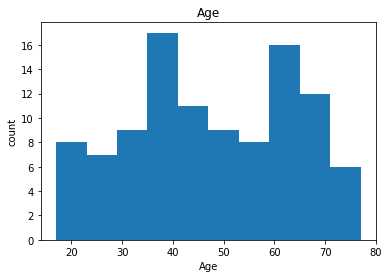

In [95]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["Age"])

# set x/y labels and plot title
plt.pyplot.xlabel("Age")
plt.pyplot.ylabel("count")
plt.pyplot.title("Age")

Text(0.5, 1.0, 'Lymphocyte_Count bins')

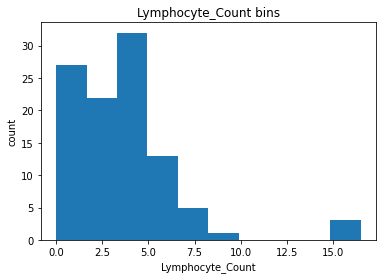

In [86]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["Lymphocyte_Count"])

# set x/y labels and plot title
plt.pyplot.xlabel("Lymphocyte_Count")
plt.pyplot.ylabel("count")
plt.pyplot.title("Lymphocyte_Count bins")

In [88]:
import numpy as np

In [90]:
bins = np.linspace(min(df["Lymphocyte_Count"]), max(df["Lymphocyte_Count"]), 4)
bins

array([ 0. ,  5.5, 11. , 16.5])

We set group  names:


In [96]:
group_names = ['less than 5', '5 to 11', '11+']

We apply the function "cut" to determine what each value of `df['horsepower']` belongs to.


In [97]:
df['Lymphocyte_Count_Binned'] = pd.cut(df['Lymphocyte_Count'], bins, labels=group_names, include_lowest=True )
df[['Lymphocyte_Count','Lymphocyte_Count_Binned']].head(20)

,Lymphocyte_Count,Lymphocyte_Count_Binned
1,0.44,less than 5
2,4.39,less than 5
3,3.47,less than 5
4,0.80,less than 5
5,7.93,5 to 11
6,4.12,less than 5
7,1.92,less than 5
8,6.53,5 to 11
9,0.34,less than 5
10,2.00,less than 5


Let's see the number of vehicles in each bin:


In [98]:
df["Lymphocyte_Count_Binned"].value_counts()

less than 5    87
5 to 11        13
11+             3
Name: Lymphocyte_Count_Binned, dtype: int64

Let's plot the distribution of each bin:


Text(0.5, 1.0, 'Lymphocyte_Count bins')

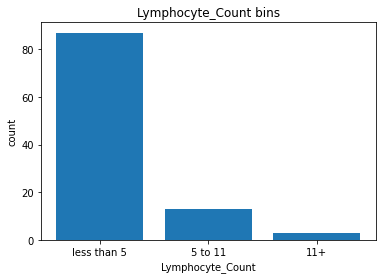

In [99]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["Lymphocyte_Count_Binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Lymphocyte_Count")
plt.pyplot.ylabel("count")
plt.pyplot.title("Lymphocyte_Count bins")

<h3>Bins Visualization</h3>
Normally, a histogram is used to visualize the distribution of bins we created above. 


Text(0.5, 1.0, 'Lymphocyte_Count bins')

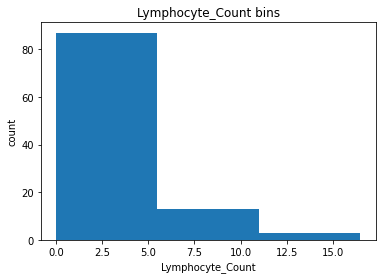

In [100]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["Lymphocyte_Count"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("Lymphocyte_Count")
plt.pyplot.ylabel("count")
plt.pyplot.title("Lymphocyte_Count bins")

The plot above shows the binning result for the attribute "horsepower".


<h2 id="indicator">Indicator Variable (or Dummy Variable)</h2>

In [101]:
df.columns

Index(['Admission_Date', 'Discharge_DATE', 'Outcome', 'Age', 'Gender',
       'Sample_Collection_Date', 'Treatment', 'Ventilated (Y/N)',
       'Red_blood_cell_distribution_width', 'Monocytes(%)',
       'White_blood_cell_count', 'Platelet_Count', 'Lymphocyte_Count',
       'Neutrophils_Count', 'Lymphocyte_Count_Binned'],
      dtype='object')

Get the indicator variables and assign it to data frame "dummy_variable\_1":


In [102]:
dummy_variable_1 = pd.get_dummies(df["Ventilated (Y/N)"])
dummy_variable_1.head()

,No,Yes
1,0,1
2,0,1
3,1,0
4,1,0
5,1,0


Change the column names for clarity:


In [103]:
dummy_variable_1.rename(columns={'No':'Ventilated-No', 'Yes':'Ventilated-Yes'}, inplace=True)
dummy_variable_1.head()

,Ventilated-No,Ventilated-Yes
1,0,1
2,0,1
3,1,0
4,1,0
5,1,0


In the dataframe, column 'fuel-type' has values for 'gas' and 'diesel' as 0s and 1s now.


In [104]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
#df.drop("fuel-type", axis = 1, inplace=True)

In [105]:
df.head()

,Admission_Date,Discharge_DATE,Outcome,Age,Gender,Sample_Collection_Date,Treatment,Ventilated (Y/N),Red_blood_cell_distribution_width,Monocytes(%),White_blood_cell_count,Platelet_Count,Lymphocyte_Count,Neutrophils_Count,Lymphocyte_Count_Binned,Ventilated-No,Ventilated-Yes
1,8/10/2020,8/8/2020,Not Recovered,51,Male,8/10/2020,"Antibiotics, O2",Yes,13.2,3.3,21.00,462.00,0.44,19.43,less than 5,0,1
2,7/24/2020,8/5/2020,Not Recovered,65,Female,7/24/2020,"Paracetamol, Antibiotics, O2",Yes,40.0,3.0,8.79,180.66,4.39,7.56,less than 5,0,1
3,7/22/2020,8/8/2020,Recovered,32,Male,7/22/2020,"Antibiotics, O2",No,11.7,5.3,9.90,336.00,3.47,5.34,less than 5,1,0
4,7/19/2020,8/5/2020,Recovered,36,Female,7/19/2020,"Antibiotics, O2",No,13.0,5.0,9.95,240.10,0.80,8.66,less than 5,1,0
5,7/18/2020,8/5/2020,Recovered,46,Male,7/18/2020,"Paracetamol, Antibiotics, O2",No,31.0,3.0,14.15,236.58,7.93,13.02,5 to 11,1,0


Save the new csv:


In [106]:
df.to_csv('cov19_cvc_cleaned.csv')